In [1]:
import pandas as pd
import numpy as np

### Reading JSON

In [4]:
folks = pd.read_json('datasets/folks.json')

In [5]:
folks.head()

,name,salary,occupation
0,Brian Dogood,64000,Software Technician
1,Leah Bokeh,73200,Data Scientist
2,Mark Prescott,76400,Business Consultant
3,Jurgen Gupta,94300,Aerospace Engineer


In [6]:
type(folks)

pandas.core.frame.DataFrame

In [7]:
folks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        4 non-null      object
 1   salary      4 non-null      int64 
 2   occupation  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


### Reading HTML

In [8]:
data_url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'

In [9]:
countries = pd.read_html(data_url)

In [12]:
type(countries)

list

In [13]:
len(countries)

2

In [15]:
countries[0]

,Rank,Country / Dependency,UN Region,Population,Percentage of the world,Date,Source (official or from the United Nations),Notes
0,–,World,NaN,7964193000,100%,15 Jul 2022,UN projection[2],NaN
1,1,China,Asia,1412600000,NaN,31 Dec 2021,National annual estimate[3],The population figure refers to mainland China...
2,2,India,Asia,1373761000,NaN,1 Mar 2022,Annual national estimate[4],The figure includes the population of Indian-a...
3,3,United States,Americas,332888089,NaN,15 Jul 2022,National population clock[5],The figure includes the 50 states and the Dist...
4,4,Indonesia,Asia[b],272248500,NaN,1 Jul 2021,National annual estimate[6],NaN
...,...,...,...,...,...,...,...,...
237,–,Niue,Oceania,1549,NaN,1 Jul 2021,National annual projection[94],NaN
238,–,Tokelau (New Zealand),Oceania,1501,NaN,1 Jul 2021,National annual projection[94],NaN
239,195,Vatican City,Europe,825,NaN,1 Feb 2019,Monthly national estimate[198],The total population of 825 consisted of 453 r...
240,–,Cocos (Keeling) Islands (Australia),Oceania,573,NaN,30 Jun 2020,National annual estimate[197],NaN


In [17]:
# countries[1]

In [25]:
countries = countries[0].loc[:,['Country / Dependency','Population']]

In [28]:
countries = countries.rename({'Country / Dependency':'Country'},axis=1)[1:]

In [29]:
countries.head()

,Country,Population
1,China,1412600000
2,India,1373761000
3,United States,332888089
4,Indonesia,272248500
5,Pakistan,229488994


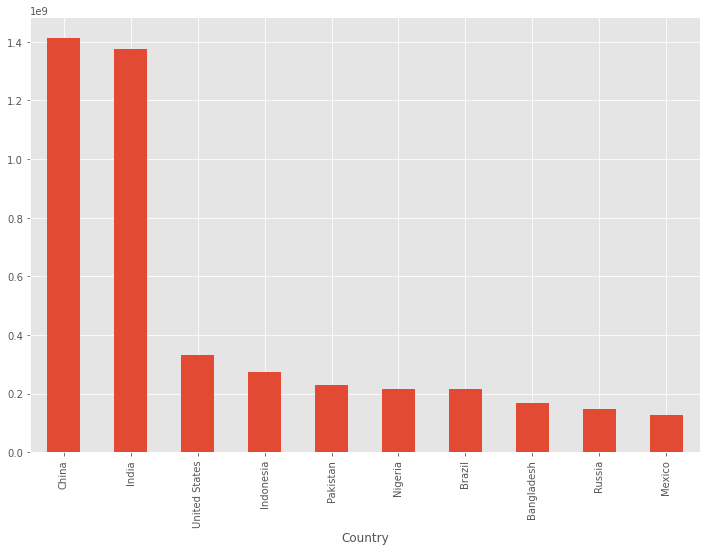

In [40]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
countries.set_index('Country').squeeze().nlargest(10).plot(kind='bar',figsize=(12,8));

### Reading Excel

In [41]:
# xls -----> binary format
# xlsx ----> xml based, avalilabe in newer versions

In [49]:
folks = pd.read_excel('datasets/folks.xlsx',sheet_name='folks')

In [50]:
folks.head()

,name,salary,occupation
0,Brian Dogood,64000,Software Technician
1,Leah Bokeh,73200,Data Scientist
2,Mark Prescott,76400,Business Consultant
3,Jurgen Gupta,94300,Aerospace Engineer


In [48]:
hobbies = pd.read_excel('datasets/folks.xlsx',sheet_name='hobbies')

In [51]:
hobbies.head()

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


In [55]:
# position based indexing for sheet_name
# xlrd --- for excel reading
# xlwt --- for excel writing

pd.read_excel('datasets/folks.xlsx',0)

,name,salary,occupation
0,Brian Dogood,64000,Software Technician
1,Leah Bokeh,73200,Data Scientist
2,Mark Prescott,76400,Business Consultant
3,Jurgen Gupta,94300,Aerospace Engineer


In [53]:
pd.read_excel('datasets/folks.xlsx',1)

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


In [56]:
!pip show xlrd

Name: xlrd
Version: 2.0.1
Summary: Library for developers to extract data from Microsoft Excel (tm) .xls spreadsheet files
Home-page: http://www.python-excel.org/
Author: Chris Withers
Author-email: chris@withers.org
License: BSD
Location: /home/aayush/anaconda3/lib/python3.7/site-packages
Requires: 
Required-by: 


In [57]:
!pip show openpyxl

Name: openpyxl
Version: 3.0.7
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: /home/aayush/anaconda3/lib/python3.7/site-packages
Requires: et-xmlfile
Required-by: 


### Creating Output: The to_* Family of Methods

In [59]:
hobbies = pd.read_excel('datasets/folks.xlsx',1)

In [60]:
hobbies.head()

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


In [61]:
# add a new person and save the resulting df to csv

In [63]:
hobbies.loc[4] ={'name':'aayush',
                 'hobby':'traveling'}

In [64]:
hobbies.head()

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing
4,aayush,traveling


In [65]:
hobbies.loc[5] =['rama','sleeping']

In [66]:
hobbies

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing
4,aayush,traveling
5,rama,sleeping


In [68]:
hobbies['age']=[20,20,12,12,20,34]

In [69]:
hobbies

,name,hobby,age
0,Brian Dogood,Fishing,20
1,Leah Bokeh,Skateboarding,20
2,Mark Prescott,Value Investing,12
3,Jurgen Gupta,Drawing,12
4,aayush,traveling,20
5,rama,sleeping,34


In [71]:
np.random.uniform(23,40,5)

array([27.78836397, 39.79709118, 37.5435585 , 29.16175491, 24.60920603])

In [75]:
hobbies.to_csv('hobbies.csv',index=False)

In [76]:
pd.read_csv('hobbies.csv')

,name,hobby,age
0,Brian Dogood,Fishing,20
1,Leah Bokeh,Skateboarding,20
2,Mark Prescott,Value Investing,12
3,Jurgen Gupta,Drawing,12
4,aayush,traveling,20
5,rama,sleeping,34


In [77]:
!ls

 DataFrameII.ipynb		'multiple dataframe.ipynb'
 Dataframes.ipynb		 Reading_Data.ipynb
 datasets			 Reshaping_with_Pivots.ipynb
 GroupBy_Aggregates.ipynb	 series_at_glance.ipynb
'Handling Data and Time.ipynb'	 series_methods_and_handling.ipynb
 hobbies.csv			'String Manipulation.ipynb'
 MultiIndex.ipynb		 visualizing_data.ipynb


In [78]:
!pwd

/home/aayush/data_science/Data_Analysis


In [79]:
!rm sample_data -rf

In [80]:
!rm hobbies.csv -rf

In [81]:
!ls

 DataFrameII.ipynb		 Reading_Data.ipynb
 Dataframes.ipynb		 Reshaping_with_Pivots.ipynb
 datasets			 series_at_glance.ipynb
 GroupBy_Aggregates.ipynb	 series_methods_and_handling.ipynb
'Handling Data and Time.ipynb'	'String Manipulation.ipynb'
 MultiIndex.ipynb		 visualizing_data.ipynb
'multiple dataframe.ipynb'


In [82]:
hobbies.to_csv('datasets/hobbies.csv',index=False)

In [83]:
!ls datasets/

2017BostonMarathonTop1000.csv  games_sales.csv		party.csv
BrentOilPrices.csv	       hobbies.csv		regions.csv
drinks.csv		       ivies.csv		scores.csv
eng.csv			       liberal_arts.csv		soccer.csv
folks.json		       mid_career_salaries.csv	state.csv
folks.xlsx		       nutrition.csv		tech_giants.csv


In [85]:
hobbies.to_json('datasets/hobbies.json')

In [86]:
pd.read_json('datasets/hobbies.json')

,name,hobby,age
0,Brian Dogood,Fishing,20
1,Leah Bokeh,Skateboarding,20
2,Mark Prescott,Value Investing,12
3,Jurgen Gupta,Drawing,12
4,aayush,traveling,20
5,rama,sleeping,34


In [88]:
hobbies.to_html('datasets/hobbies.html')

### Pickling

In [92]:
googl = {'ticker':'GOOGL','shares':10, 'book_cost':1540.23}

In [93]:
import pickle

In [95]:
pickle_output = open('my_stock','wb')

# pointer to the file

In [96]:
pickle.dump(googl,pickle_output)

In [97]:
pickle_output.close()

In [98]:
!ls

 DataFrameII.ipynb		 my_stock
 Dataframes.ipynb		 Reading_Data.ipynb
 datasets			 Reshaping_with_Pivots.ipynb
 GroupBy_Aggregates.ipynb	 series_at_glance.ipynb
'Handling Data and Time.ipynb'	 series_methods_and_handling.ipynb
 MultiIndex.ipynb		'String Manipulation.ipynb'
'multiple dataframe.ipynb'	 visualizing_data.ipynb


In [99]:
pickle_input = open('my_stock','rb')

In [100]:
stock_dict = pickle.load(pickle_input)

In [101]:
stock_dict

{'ticker': 'GOOGL', 'shares': 10, 'book_cost': 1540.23}

In [102]:
!hexdump my_stock

0000000 0380 717d 2800 0658 0000 7400 6369 656b
0000010 7172 5801 0005 0000 4f47 474f 714c 5802
0000020 0006 0000 6873 7261 7365 0371 0a4b 0958
0000030 0000 6200 6f6f 5f6b 6f63 7473 0471 4047
0000040 1098 85eb b81e 7552 002e               
0000049


In [104]:
folio = pd.read_pickle('datasets/portfolio')

In [105]:
folio

,ticker,shares,book_cost
0,AAPL,150,123.23
1,GOOGL,10,1100.00
2,AMGN,230,227.23
3,VET,200,14.24
4,TSLA,100,260.00
5,DX,40,20.01


In [107]:
folio.to_pickle('folio')

In [108]:
!ls

 DataFrameII.ipynb		 my_stock
 Dataframes.ipynb		 Reading_Data.ipynb
 datasets			 Reshaping_with_Pivots.ipynb
 folio				 series_at_glance.ipynb
 GroupBy_Aggregates.ipynb	 series_methods_and_handling.ipynb
'Handling Data and Time.ipynb'	'String Manipulation.ipynb'
 MultiIndex.ipynb		 visualizing_data.ipynb
'multiple dataframe.ipynb'


In [110]:
pd.read_pickle('folio')

,ticker,shares,book_cost
0,AAPL,150,123.23
1,GOOGL,10,1100.00
2,AMGN,230,227.23
3,VET,200,14.24
4,TSLA,100,260.00
5,DX,40,20.01


### The many other formats

In [111]:
# io tools in pandas

In [115]:
# feather data type to serialize dataframe
# msgpack - compact version of json


# explore them as the need arises

In [152]:
data_url = 'https://andybek.com/traders/'

In [153]:
positions = pd.read_html(data_url)

In [154]:
type(positions)

list

In [155]:
len(positions)

1

In [156]:
positions = positions[0]
positions

,TraderID,Instrument,Amount,Trader Location
0,MCBIRN,02079K107,150000,EU
1,WISEA,1350Z74U5,6400000,EU
2,IACOP,GB00B3KJDQ49,2430000,US


In [157]:
data_url2 = 'https://andybek.com/pandas-traders-names/'

In [159]:
traders = pd.read_json(data_url2)

In [160]:
traders

,names,alias,seniority
0,Shylah McBirney,MCBIRN,Executive
1,Allen Wise,WISEA,Executive
2,Iacopo Brivio,IACOP,Junior
3,Allison Carter,CARTERA,Mid-level


In [171]:
pickle_positions = pd.merge(positions,traders,how='inner',left_on='TraderID',right_on='alias').drop('alias',axis=1)

In [172]:
pickle_positions.to_pickle('pickle_positions')

In [173]:
pickle_positions.to_csv('pickle_positions.csv',index=False)

In [174]:
pd.read_pickle('pickle_positions')

,TraderID,Instrument,Amount,Trader Location,names,seniority
0,MCBIRN,02079K107,150000,EU,Shylah McBirney,Executive
1,WISEA,1350Z74U5,6400000,EU,Allen Wise,Executive
2,IACOP,GB00B3KJDQ49,2430000,US,Iacopo Brivio,Junior


In [175]:
pd.read_csv('pickle_positions.csv')

,TraderID,Instrument,Amount,Trader Location,names,seniority
0,MCBIRN,02079K107,150000,EU,Shylah McBirney,Executive
1,WISEA,1350Z74U5,6400000,EU,Allen Wise,Executive
2,IACOP,GB00B3KJDQ49,2430000,US,Iacopo Brivio,Junior
